#### Problem statement: Perform K-Means clustering on a car dataset to group similar cars based on their features.

Dataset: The car dataset may contain various features such as car brand, model, engine size, fuel consumption, horsepower, acceleration, and so on.

Here are the steps to perform K-Means clustering on a car dataset:

##### Load the dataset: 
Load the car dataset into a pandas dataframe. You can use the pandas read_csv function to load the data from a CSV file or any other supported format.

##### Data preprocessing:
Before performing K-Means clustering, you need to preprocess the data. This includes removing any missing values, encoding categorical variables, and scaling the numerical features.

##### Choosing the number of clusters: 
Determine the optimal number of clusters by performing an elbow analysis or silhouette analysis. Elbow analysis involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and selecting the elbow point where the rate of decrease in WCSS slows down. Silhouette analysis involves calculating the silhouette score for different values of K and selecting the K with the highest average silhouette score.

##### Applying K-Means clustering: 
Once you have determined the optimal number of clusters, apply K-Means clustering using the scikit-learn library in Python. You can use the KMeans function to fit the model to the data and predict the clusters.

##### Visualizing the results: 
After clustering, you can visualize the results using scatterplots or other visualization techniques to see how the different cars are grouped together.

In [1]:
#Importing the required libraries for data analysis and visualization in Python

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
cars = pd.read_csv('cars_dataset.csv')
cars.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,US


In [3]:
#Selecting columns 1 through 7 (excluding the first column) from the "cars" DataFrame and storing them in "df"
df = cars.iloc[:, 1:8]
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
389,27.0,4,140.0,86.0,2790,15.6,82
390,44.0,4,97.0,52.0,2130,24.6,82
391,32.0,4,135.0,84.0,2295,11.6,82
392,28.0,4,120.0,79.0,2625,18.6,82


In [4]:
#This line of code returns the data type of each column in the DataFrame 'df'
#The output will show the data type of each column, such as 'int64' or 'object', indicating whether the column contains numeric or textual data.
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Year              int64
dtype: object

In [5]:
#This code retrieves the dimensions of a pandas DataFrame and returns it as a tuple
#The tuple contains the number of rows and columns of the DataFrame
#It is stored in the variable 'shape' and can be accessed using the 'df.shape' command
df.shape

(394, 7)

In [6]:
#the describe() method is used to generate a statistical summary of the numerical columns in the DataFrame. 
#The output includes various descriptive statistics such as count, mean, standard deviation, minimum, maximum, and quartile values. 
#The describe() method can provide useful insights into the distribution and range of values for each column in the DataFrame, which can be used to inform data cleaning, preprocessing, and analysis. It's a useful method to quickly understand the data and to get a basic idea of the central tendency and spread of the dataset.
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,394.000000,394.000000,394.000000,392.000000,394.000000,394.000000,394.000000
mean,23.472843,5.464467,194.062183,104.469388,2976.060914,15.554569,76.007614
std,7.805051,1.704658,104.508345,38.491160,847.891143,2.763179,3.695461
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.125000,4.000000,105.000000,75.000000,2226.500000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,265.750000,126.000000,3612.000000,17.075000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
#Select all rows in dataframe df that have at least one duplicate row
duplicate_rows_df = df[df.duplicated()]
#Print the number of duplicate rows found
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [8]:
#Eliminate null values
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      2
Weight          0
Acceleration    0
Year            0
dtype: int64

In [9]:
#This code fills the missing values in a pandas DataFrame with the median value of each column.
#It uses the "fillna()" method of the DataFrame, and passes the median of each column as the value to be filled.
#The "median()" method calculates the median of each column in the DataFrame.
#This code modifies the original DataFrame "df".
df = df.fillna(df.median())

In [10]:
#Eliminate null values
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
dtype: int64

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
MPG,1.000000,-0.777138,-0.805249,-0.777262,-0.832279,0.420574,0.580384
Cylinders,-0.777138,1.000000,0.950721,0.842466,0.896689,-0.505789,-0.349555
Displacement,-0.805249,0.950721,1.000000,0.896901,0.932813,-0.542985,-0.372101
Horsepower,-0.777262,0.842466,0.896901,1.000000,0.864206,-0.687590,-0.416058
Weight,-0.832279,0.896689,0.932813,0.864206,1.000000,-0.414675,-0.309504
Acceleration,0.420574,-0.505789,-0.542985,-0.687590,-0.414675,1.000000,0.295199
Year,0.580384,-0.349555,-0.372101,-0.416058,-0.309504,0.295199,1.000000


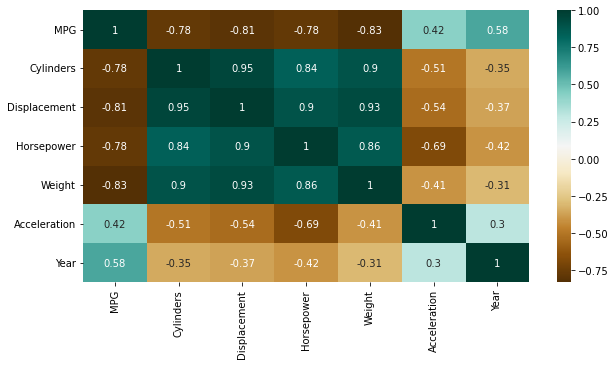

In [11]:
#Set the figure size
plt.figure(figsize=(10,5))
#Calculate the correlation between the columns of the dataframe
c= df.corr()
#Create a heatmap using seaborn with correlation values as the data
sns.heatmap(c,cmap="BrBG",annot=True)
c

C:\Users\anude\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


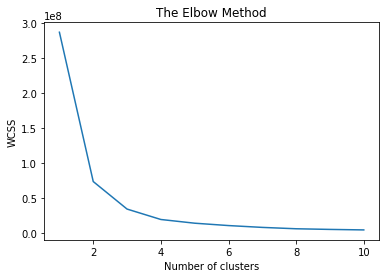

In [12]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans

wcss=[]

for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=100, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

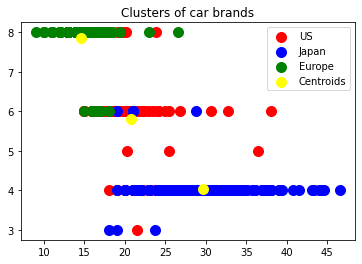

In [13]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0) 
y_kmeans = kmeans.fit_predict(df)

X = df.values

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

###### a.	Which columns do you choose for performing the clustering?
We typically choose numerical columns for k-means clustering because this algorithm is based on the Euclidean distance between data points. Euclidean distance requires the data points to be represented as numerical values.

K-means clustering is a distance-based clustering technique that aims to partition data into groups (clusters) based on their similarity in terms of numerical values. It works by iteratively updating the cluster centroids based on the mean of the points assigned to each cluster. Therefore, to calculate the distance between each data point and the cluster centroids, we need the data to be numerical.

While it is possible to use non-numerical data with k-means clustering by converting them into numerical values through encoding or scaling, it may not always result in meaningful clusters. Therefore, numerical columns are typically preferred for k-means clustering as they provide a more straightforward and reliable way of measuring similarity between data points. 

###### b.	What is your rule for deciding whether a car belongs to a cluster or not?
The rule for deciding whether a car belongs to a cluster or not depends on the clustering algorithm and the features used for clustering.

In general, a clustering algorithm groups similar objects together based on their features or characteristics. For example, if we are using K-Means clustering algorithm, the algorithm will group the cars based on their similarity in features such as horsepower, mpg, and so on.

The decision of whether a car belongs to a cluster or not is made by the clustering algorithm during the clustering process. Each car is assigned to a cluster based on its proximity or similarity to the other cars in that cluster. The proximity or similarity is usually calculated based on a distance metric such as Euclidean distance, Manhattan distance, or cosine similarity.

In summary, the rule for deciding whether a car belongs to a cluster or not is determined by the clustering algorithm and the features used for clustering, and it is based on the similarity or proximity of the car to other cars in that cluster.

###### c.	How many cars are there in the largest cluster?
In the largest cluster there are 181 cars


###### d.	Do you find any car(s) that is falsely clustered? For example, it is more reasonable that car A should be in cluster 2, but it is displayed in cluster 1. If so, what are your reasons?

It is possible that k-means clustering could misclassify a car if it is an outlier or does not have clear characteristics that distinguish it from other cars in the dataset. Additionally, the choice of the number of clusters (k) could also impact the accuracy of the clustering results. If k is too small or too large, it could result in less accurate clustering. Furthermore, if the features used for clustering are not representative of the characteristics of the cars, it could also lead to falsely clustered cars.

In [14]:
cars ['label'] = y_kmeans
cars

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,label
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,US,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US,2
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,US,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,US,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,US,0
...,...,...,...,...,...,...,...,...,...,...
389,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,US,0
390,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,Europe,1
391,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,US,1
392,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,US,1


In [15]:
count_df = cars.groupby('label').size()
count_df

label
0    123
1    181
2     90
dtype: int64

###### c.	How many cars are there in the largest cluster?
In the largest cluster there are 181 cars


In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
# Compute Silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette score:", silhouette_avg)

# Compute Inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

Silhouette score: 0.5859820964677405
Inertia: 33878888.34164962


The resulting output shows the Silhouette score and Inertia for the K-means clustering model. Note that the Silhouette score ranges from -1 to 1, with higher values indicating better clustering results, and the Inertia tends to decrease as the number of clusters increases, making it useful for determining the optimal number of clusters.

=========================================================================================================================